In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.ndimage import label, binary_fill_holes
from skimage.measure import perimeter

# packages needed for animation
import ffmpeg
from IPython.display import clear_output, display, HTML
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.colors import ListedColormap

In [3]:
# python imports
import numpy as np
import random
import os
import pickle

from mcf10amigration import *
#from mcf10amigration.cpm_initializations import *
#from mcf10amigration.cpm import *
#from mcf10amigration.gillespie_step import *
#from mcf10amigration.hams import *
#from mcf10amigration.monte_carlo_step import *
#from mcf10amigration.visuals import *
#from mcf10amigration.light import *


Monte Carlo Simulation: 0it [00:00, ?it/s]


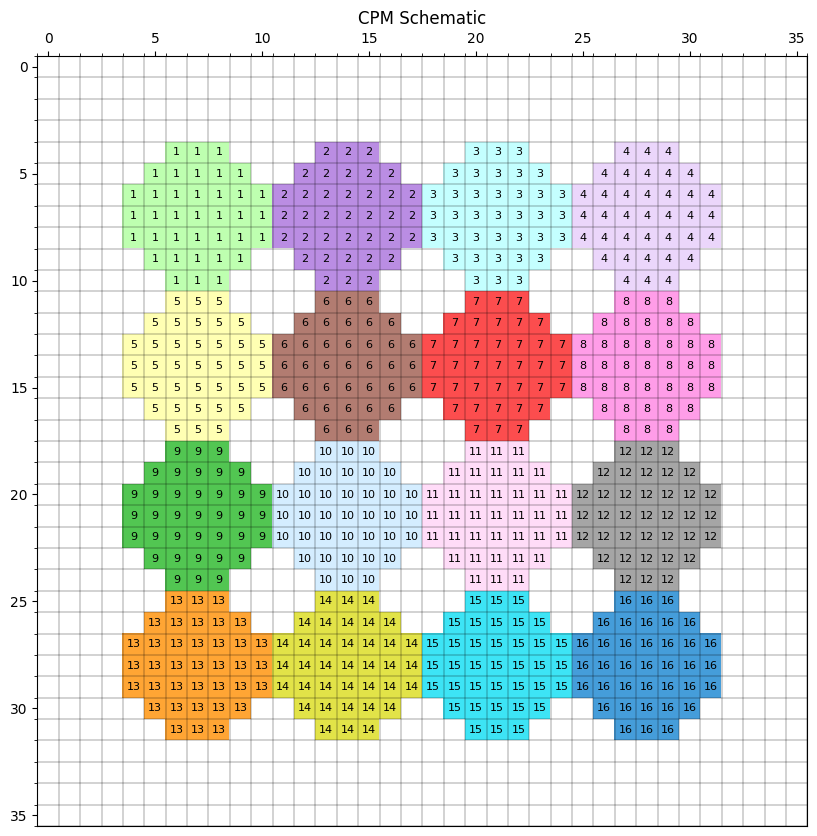

In [34]:
#CPM schematic figure

target_area = 37 #49 #37
target_perimeter = 20.992 #20.992 #0.00

cpm = CPM(
    grid_size=28+8,
    initialization="tissue_sparse", 
    margin=4)

SimulationResult = mc_sim(cpm, num_steps=0)

#adjust colormap to include white at first position

num_colors = np.max(cpm.grid)
#pastel_colors = plt.colormaps['tab20']
#colormap = pastel_colors(np.linspace(0, 1, num_colors+1))
#colormap[0, :] = [1, 1, 1, 1]  # set first values (0, background color) to be white
#colormap = ListedColormap(colormap)
base_colors = plt.colormaps['tab20'](np.linspace(0, 1, num_colors))  # take num_colors from tab20
lightened = np.clip(base_colors + 0.15, 0, 1)  # add 0.3 to RGB, makes lighter
lightened = np.random.permutation(lightened) # randomize order
colormap = ListedColormap(np.vstack([[1,1,1,1], lightened])) # make first color white


# plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cpm.grid, cmap=colormap, interpolation='nearest')

# cell ID text annotations
for x in range(cpm.grid_size):
    for y in range(cpm.grid_size):
        cell_id = cpm.grid[y, x]
        if cell_id != 0:  # Only annotate cells with IDs
            ax.text(x, y, str(cell_id), color='black', ha='center', va='center', fontsize=8)

ax.set_title("CPM Schematic")
ax.set_xticks(np.arange(-0.5, cpm.grid_size, 1), minor=True)
ax.set_yticks(np.arange(-0.5, cpm.grid_size, 1), minor=True)
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.grid(which='minor', color='black', linestyle='-', linewidth=0.25)

plt.show()

In [ ]:
#fig.savefig("CPM_schematic.tiff", dpi=600, format='tiff')

#fig.savefig(
#    "CPM_schematic.tiff",
#    dpi=600,
#    format="tiff",
#    bbox_inches="tight",
#    pil_kwargs={"compression": "tiff_deflate"},
#)

: 

In [5]:
import pickle

with open("trial_data/no_zero_choice/simulation_results_k0through4.pkl", "rb") as f:
    simulation_results_k04 = pickle.load(f)
with open("trial_data/no_zero_choice/simulation_results_k5through9.pkl", "rb") as f:
    simulation_results_k59 = pickle.load(f)
with open("trial_data/no_zero_choice/simulation_results_k10through14.pkl", "rb") as f:
    simulation_results_k1014 = pickle.load(f)
with open("trial_data/no_zero_choice/simulation_results_k15through20.pkl", "rb") as f:
    simulation_results_k1520 = pickle.load(f)

#sim_data = simulation_results_k1014[4].cell_states
#sim_light = simulation_results_k1014[4].light_patterns
#sim_times = simulation_results_k1014[4].event_times

#animate_cell_simulation(sim_data, sim_times)
#animate_light_pattern(sim_light, sim_times)



In [6]:
sim_list = simulation_results_k04 + simulation_results_k59 + simulation_results_k1014 + simulation_results_k1520

with open("trial_data/zero_choice_no_stickiness/simulation_results_k0through4.pkl", "rb") as f:
    simulation_results = pickle.load(f)

animate_cell_simulation(simulation_results[4].cell_states, simulation_results[4].event_times)

#for i in range(len(simulation_results_k1520)):
#    plot_one_frame(simulation_results_k1520[i].cell_states[99], title = f"k={i}")
    

    

In [6]:
type(sim_list[i].cell_states[99])

numpy.ndarray

In [7]:
range(len(sim_list))

range(0, 15)

In [8]:
print(type(sim_list))

<class 'list'>


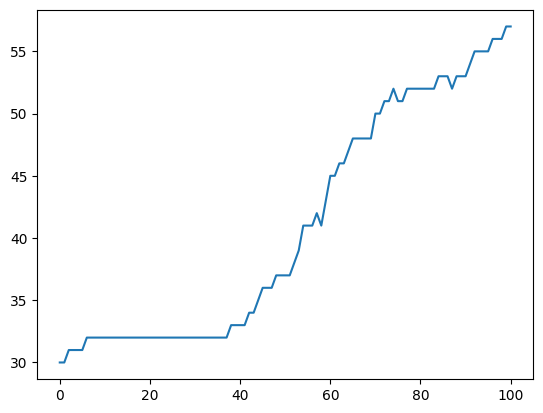

In [7]:

counts = []

for i in range(0, len(sim_list[20].cell_states)):
    counts.append(inside_circle_count(sim_list[20].cell_states[i], 37, 37, 17))
    
counts = np.array(counts)
event_times = np.array(sim_list[20].event_times)

plt.plot(event_times, counts)


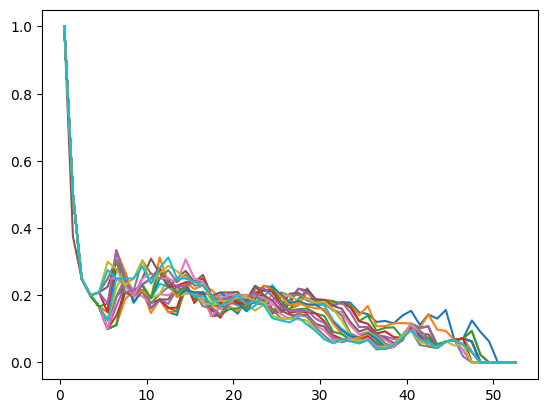

In [8]:
for i in range(0, 99, 5):
    bin_centers, bin_edges, values = radial_density(sim_list[20].cell_states[i], 1)
    plt.plot(np.array(bin_centers), values)
    

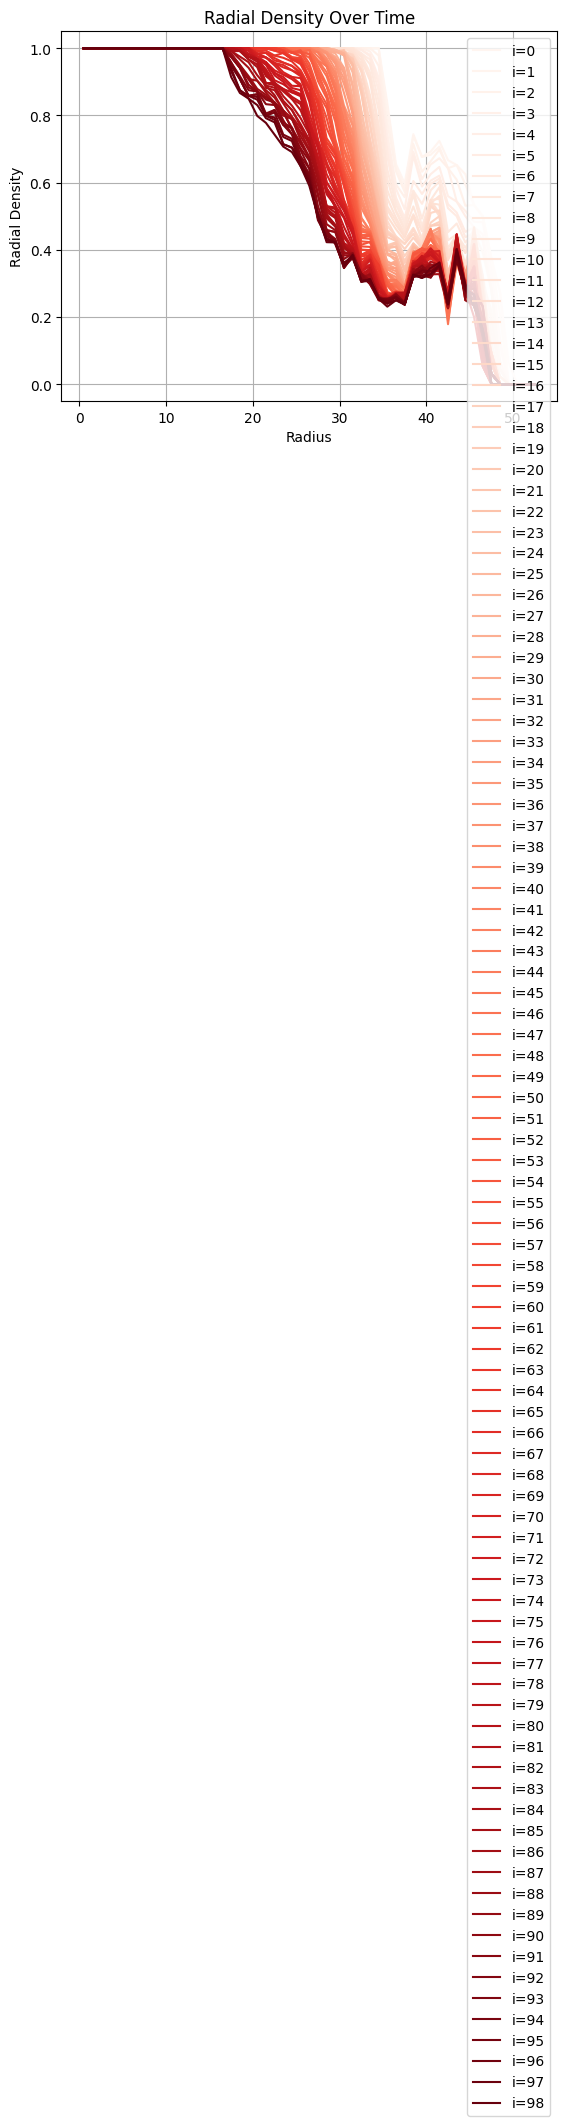

In [23]:
iterations = range(0, 99, 1)
num_plots = len(iterations)

cmap = plt.colormaps.get_cmap("Reds")

# colors for each iteration
colors = [cmap(i / (num_plots - 1)) for i in range(num_plots)]

for index, i in enumerate(iterations):
    bin_centers, bin_edges, values = radial_density(sim_list[20].cell_states[i], bin_width=1)
    
    plt.plot(bin_centers, values, color=colors[index], label=f'i={i}')

plt.xlabel('Radius')
plt.ylabel('Radial Density')
plt.title('Radial Density Over Time')
plt.grid(True)
plt.legend()
plt.show()

In [35]:
with open("trial_data/sticky_and_zero_choice/simulation_results_bar_light_1.pkl", "rb") as f:
    sim_res = pickle.load(f)
animate_cell_simulation(sim_res[0].cell_states, sim_res[0].event_times, fps=10)
#animate_light_pattern(sim_res[4].light_patterns, sim_res[0].event_times, fps=10)


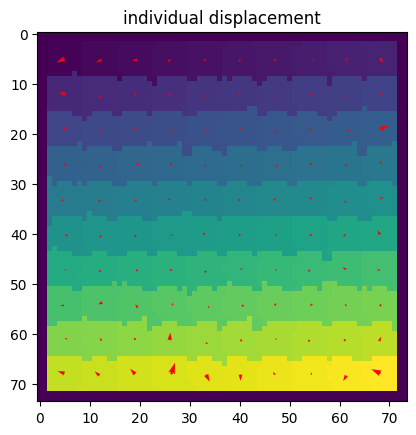

[[ 6.09803922  3.98039216]
 [ 5.20408163 11.91836735]
 [ 5.77083333 18.35416667]
 [ 5.76       25.28      ]
 [ 6.46       33.6       ]
 [ 4.8125     40.5       ]
 [ 5.36734694 47.06122449]
 [ 5.33333333 53.72916667]
 [ 5.82352941 61.7254902 ]
 [ 5.5        69.5       ]
 [12.42857143  2.75510204]
 [11.90196078 10.41176471]
 [12.82       18.46      ]
 [12.02040816 26.26530612]
 [13.35416667 32.85416667]
 [12.06       39.98      ]
 [12.6        47.32      ]
 [12.28       54.48      ]
 [12.35294118 61.70588235]
 [11.70588235 69.64705882]
 [18.5         4.        ]
 [18.42553191 12.        ]
 [19.19565217 19.13043478]
 [18.9375     25.9375    ]
 [19.60869565 33.63043478]
 [18.73913043 40.91304348]
 [19.5106383  47.70212766]
 [18.73913043 54.7826087 ]
 [19.83333333 61.29166667]
 [17.69387755 68.73469388]
 [24.45652174  6.30434783]
 [25.77083333 12.4375    ]
 [26.         19.        ]
 [25.74468085 25.89361702]
 [26.04       32.92      ]
 [26.         40.        ]
 [26.         47.        ]
 

In [34]:
#animate_cell_simulation(sim_res[2].cell_states, sim_res[2].event_times, fps=10)
end, start, disp = avg_displacement(sim_res[0].cell_states[0], sim_res[0].cell_states[99])
visualize_displacement(sim_res[2].cell_states[0], sim_res[2].cell_states[99])
print(end)
print("-------")
print(start)
print("-------")
print(disp)

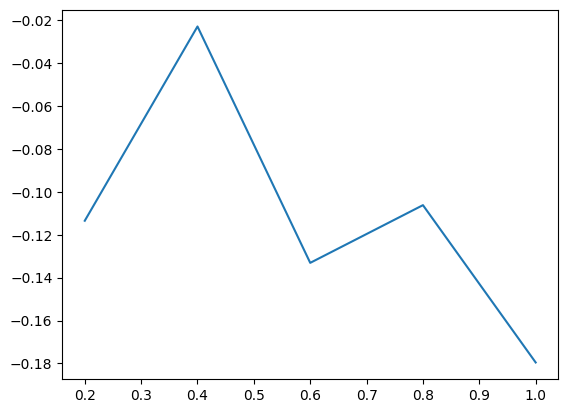

In [32]:

avg_displacements = []

for i in range(0, 5):
    avg_displacements.append(avg_displacement(sim_res[i].cell_states[0], sim_res[i].cell_states[99], "y"))
    
speed = [0.2, 0.4, 0.6, 0.8, 1]

plt.plot(speed, avg_displacements)



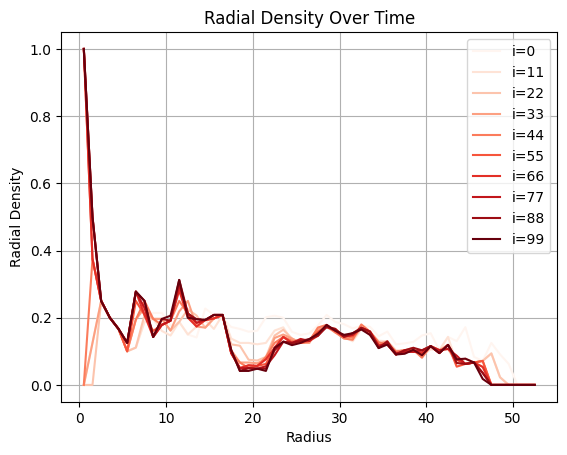

In [13]:
iterations = range(0, 100, 11)
num_plots = len(iterations)

cmap = plt.colormaps.get_cmap("Reds")

# colors for each iteration
colors = [cmap(i / (num_plots - 1)) for i in range(num_plots)]

for index, i in enumerate(iterations):
    bin_centers, bin_edges, values = radial_density(sim_res.cell_states[i], bin_width=1)
    
    plt.plot(bin_centers, values, color=colors[index], label=f'i={i}')

plt.xlabel('Radius')
plt.ylabel('Radial Density')
plt.title('Radial Density Over Time')
plt.grid(True)
plt.legend()
plt.show()

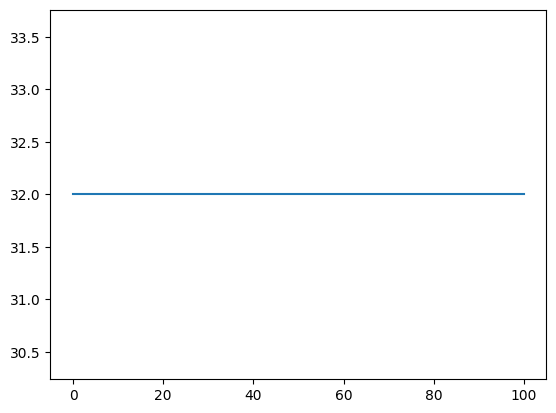

In [19]:

counts = []

for i in range(0, len(sim_res.cell_states)):
    counts.append(inside_circle_count(sim_res.cell_states[i], 37, 37, 17))
    
counts = np.array(counts)
event_times = np.array(sim_res.event_times)
k_vals = np.arange(0, len(sim_res.cell_states))

plt.plot(k_vals, counts)
animate_cell_simulation(sim_res.cell_states, sim_res.event_times)
